# Machine Learning: Modelling, Optimization and Loss

* Machine Learning Review
    * Data
    * Models and Linear Models
    * Loss
        * Distance
        * Regularization
    * Optimization
        * Gradients
        * Learning Rate
    * Explanatory vs. Statistical Approaches


# Overview

In this section we review the essential notation and conceptual foundations of machine learning. 

A grasp of notation is needed to fully engage with both the instructional (, educational) literature on ML; library documentation; and the broader community ecosystem.  


# Data

In a tabular view, a column represents a variable (, covariate, random variable, feature, target). The rows of that column are its observed values, each row corresponding to a particular example or data point. 

The observation index, i, is often given as a superscript or left off (ie., so we read x as an x rather than the whole dataset x). So that the subscript refers to different variables, ie., x1, x2, .. are different features of a single observation x. 


The entire data set is often split into test/training subsets. The training subset is used to solve the learning problem, and the test set to evaluate the quality (, performance) of that solution. 


### Example

In [158]:
import numpy as np

age = 18 + np.random.normal(10, 5, 10)//1
iq = np.random.normal(100, 15, 10)//1
rating = (5*(age/age.max()) + 3*(iq/iq.max()) + np.random.normal(1, 1, 10))//1

In [159]:
X = np.c_[age, iq]
y = rating

In [160]:
X.shape, y.shape

((10, 2), (10,))

In [161]:
print(np.c_[X,y])

[[ 23.  93.   4.]
 [ 30.  87.   7.]
 [ 20. 111.   6.]
 [ 31. 102.   8.]
 [ 28.  80.   7.]
 [ 27.  97.   6.]
 [ 30. 104.   6.]
 [ 38. 107.   9.]
 [ 26. 104.  10.]
 [ 28. 109.   7.]]


### Exercise

Model a dataset for a room with a temperature distribution. The heater is in the centre of the room (0, 0) and the temperature decreases from 20C outwards quadratically in each direction.

ie. $temp(x_1, x_2) = 20 - 0.01(x_1 + x_2)^2 + e_i$
where the errors $e_i$ are distributed normally 

* define two features and a target
    * x_1 and x_2 should form a grid of positions, eg., via `linspace`

# Models

In general, we aim to find a model (estimate function) $\hat{f}$ of a true function $f$. 

$\hat{f} = \underset{f} {\mathrm{arg\,max}} ~\mathbb{E}_{unseen} \, l(f(x), y)$

via empirical loss minimization:

$\hat{f} = \underset{f} {\mathrm{arg\,max}} ~\frac{1}{N}\Sigma_{training} \, l(f(x), y)$

### Linear Models
In regression the estimate $\hat{f}$ accepts features of a observation $x$ and provides a real number estimate for y,  ie., $\hat{y}$.

Linear regression models have the form

$\hat{f} = w_0x_0 + \dots + w_nx_n + b = w \cdot x = w^Tx$

### Example

In [243]:
def f(X, w, b):
    return w @ X.T + b 

# or,
def f_(X, w, b):
    return w[0] * X[:,0] + w[1] * X[:, 1] + b


w_trial = np.array([0.02, 0.05])
b_trial = 0.5
x_unseen = np.array([[20, 100]])

print(
    f(x_unseen, w_trial, b_trial),
    f_(x_unseen, w_trial, b_trial)
)

[5.9] [5.9]


### Exercise

Write a suitable model, ie.,

* $g(X; w, b) = b + w(X_0 + X_1)^2$

* initialize a $w_{guess}$ and a $b_{guess}$ and calculate the temperature for $(0,0)$


# Types of Learning

In supervised learning, $\hat{f}(x)$ is found by varying the model or its parameters until its estimates for y are the best according to some criterion formalized by the loss.

To determine whether an estimate is good, we require known target values $y$ for each known observation $x$. 

In unsupervised learning we tend to be estimating $\hat{f} = p(x_1, x_2, ...x_n)$, ie., the function to be learned is the joint probability of the dataset (roughly: how likely it is to observe $x_1$ *and* $x_2$ occuring).


A distinction is sometimes made between classification: $\hat{f} = ... p(x|y) ...$, and prediction: $\hat{f} = ... p(y|x) ...$. Where in the former case the probability of observing a feature $x$, given a known label $y$ is the heart of the decision about what $x$ is. In the latter case, the estimate for $y$ is derived from how likely it is given $x$. 

Classification is concerned with the past in the sense that the estimating function is trained taking the target $y$ as a given (we known the complete domain of $y$ and the distribution of $y$ in the dataset biases the model). Prediction is concerned with the future in the sense that it is trained not assuming $y$ (the domain is open; the distribution of $y$ in training tends not to bias). In classification, we generalize from the known labels to the unknown features. In prediction, we generalize from known features to unknown targets. 


## Regression

Regression is a supervised learning problem whose target is a real number. Eg., estimating the price of a car; the age of a student; the profit from an ad campaign; the probability of reoffence for a given crime.


## Classification

Classification is a supervised learning problem. The target, y, is a discrete number representing one of several labels. A binary classification problem usually has the target domain ${-1,+1}$ as the "negative" and "positive" outcomes. Binary classification is a model of many experiments and decision making processes (null hypothesis vs expected; yes vs no; pass vs play; etc.).

In general classification is the labelling of some observation x with an estimated label $\hat{y}$ via training a model on seen pairs $(x, y)$.

## Classification as Regression

A regression model is often the basis of solving a classification problem. In this case the real-number output of the model is interpreted as a score and mapped to a class. 

This map is called a decision function, eg., 



### Example

In [208]:
f(x_unseen, w_trial, b_trial)

array([5.9])

In [222]:
def classifier(x, w, b):
    score = f(x, w, b)
    return 1 if score >= 0  else -1

print("(0,0) -> ", classifier(x_unseen, w_trial, b_trial))
print("(-10, -10) -> ", classifier(np.array([-10, -10]), w_trial, b_trial))

(0,0) ->  1
(-10, -10) ->  -1


### Exercise

In [229]:
def f_multi(x, w):
    return [
        w[0] @ x[0, :],
        w[1] @ x[1, :], 
        w[2] @ x[2, :]
    ]

x_eg = np.array([
    [2, 2],
    [10, 4],
    [0, 1]
])

w_eg = [(0.1, 0.2), (0.3, -0.1), (0.5, -0.5)]

f_multi(x_eg, w_eg)

[0.6000000000000001, 2.6, -0.5]

* Define the softmax function
    * `exp(x)/sum(exp(x))`
* And hence, a decision function for f_mulit()
    * report the label for the maximum softmax'd entry  (HINT: `np.argmax`)
    * and report the probability 

# Explanatory and Associative Modelling

## Explanatory Models

Explanatory models are relations of causal variables, parameterised by the strength of effect of each variable. 


An explanatory model, eg. $dial \xrightarrow[]{causes} temperature$

May predict an observed association:

$temperature(dial) = 16 + 3dial$

A causal variable is one we may act upon and which, post-interaction, produces a change in a effect variable.

Explanatory models describe all possible states of the world (, environment) under change of relevant variable: given complete (cause1, cause2, ... effect) variables described by the model, it should not be possible to observe a value for the effect untracked by the model.

Insofar as explanatory models fail they do so because they are incomplete, or take the wrong form (eg., temperature is not merely caused by thermostat activity, but also, window-breeze; temperature is not linearly related to thermostat position). 


Explanatory models are gaurenteed to generalize from the training set (in-sample) to the unseen set (out-sample), in the sense that, if the explanatory model is complete and applicable, the same causal laws work in the both domains. 

In [6]:
import seaborn as sns

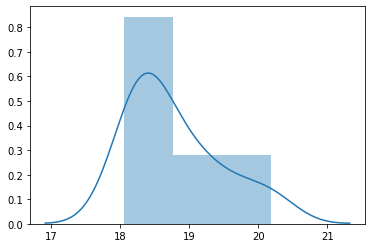

In [613]:
def room_temperature(dial_setting):
    model = [ np.random.normal(16 + 0.5*dial, 0.1*(1 + dial), 10) for dial in range(11) ]
    return model[dial_setting]

sns.distplot(room_temperature(5));

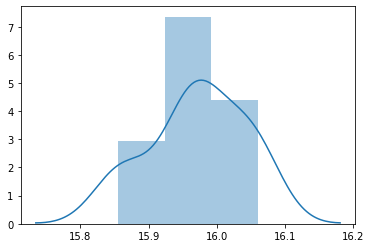

In [614]:
sns.distplot(room_temperature(0));


## Statistical-Associative Models

Associative statistical modelling aims to find any function of any variable and parameters that tracks the variation in the target y as seen the training set $(x, y)$. Regardless of whether acting upon $x$, causes, $y$ to change. 

Eg., suppose in a room all the people in coats $(x = 1)$ sat closer to the door, and all people in t-shirts $(x = 2)$ further away, then

$temperature(x) = 16 + 5x$

So that the temperature near the t-shirt area is $16 + 10 = 26$; and near the coats $16 + 5 = 21$. 

This may perfectly predict the distribution of temperature, but taking off a coat does not cause the temperature to increase! Acting upon the variable x is not the same as observing a different value for it. An action produces discontinuous changes of association, ie., all data on the current association of a dial to a temperature lacks any predictive power when the dial is changed. 

I can obtain an infinite amount of data on how one angle of a dial maps to an infinite amount of variables of interest (eg., molecule velocity). An associative model trained on this infinity is still unpredictive when the dial angle is changed! 

The causal laws of a system produce abitarily-many such associations (every dial angle corresponds to a new total state of the room) -- it is therefore impossible to "reverse" a single associative model to produced a causal one.

(Science finds causal models by generating many associative ones under action upon candidate causal variables, taking the pattern in the patterns, as causal variables change as a guide for theory building. Candidate explanatory models need to reporduce every such pattern and in addition predict novel ones to be found plausible).

Consider also a image classifier,

*classify(image) -> cat*

Supppose this classifer tracks the presence of whiskers. Clipping whiskers on cat does not turn it into a dog. The parameters of the model conspire to increase the response to whisker-like patterns in images: this produces predictive acuracy with respect to a kind of pictoral dataset, but is still merely predictive.


* Can we predict the temperature in an area where a person is wearing a coat?

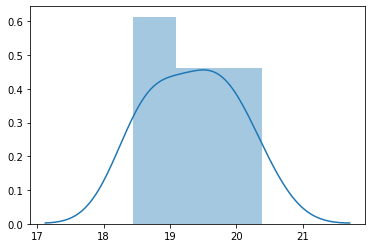

In [617]:
def coat_temperature(coat, dial=7):
    return (1 + 0.1*coat)*room_temperature(dial) - 2*coat

sns.distplot(coat_temperature(coat=True));

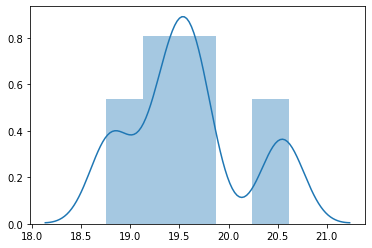

In [618]:
sns.distplot(coat_temperature(coat=False));

* Yes -- eg., 19 for Coat=True, 20 for Coat=False

* However Coat-wearing is not the cause of temperature change
* So the following assocation cannot be inferred from the data above:

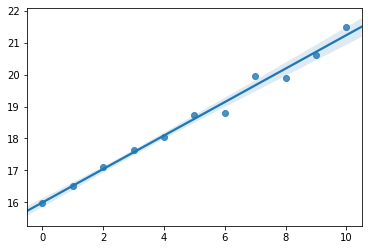

In [620]:
temps = [room_temperature(dial).mean() for dial in np.arange(0, 11)]
sns.regplot(np.arange(0, 11), temps);

* And therefore environmental change (ie., `dial=0`) produces an unpredicable distribution:

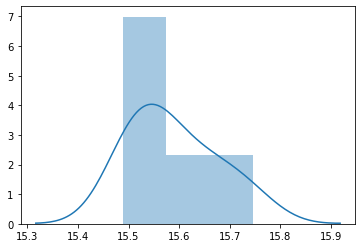

In [622]:
sns.distplot(coat_temperature(coat=True, dial=0));

* ie., the distribution for Coat=True under environmental change cannot be predicted from historical distributions. 
* The distributions for True|False only hold given static environmental conditions.


* However the regression plot (temp  vs dial) describes behaviour *during* environmental change (ie., dial change)
    * and therefore generalizes
* Since dial change *causes* temperature change, historical distributions predict future distributions (ie., the laws of physics don't change). 

### Exercise

* What does the following line calculate?

> `temp1 = [room_temperature(dial).mean() for dial in np.arange(0, 31)]`

* How would you obtain the data of `temp1` without knowing `room_temperature()` ?


* What does the following line calculate?

> `temp2 = (1 + 0.1*coat)*room_temperature(dial) - 2*coat`

* Why do the entires of `temp1` differ? 
* Why do the entries of `temp2` differ?
 


## Mere Predictive Models and The Semantic Gap

A scientific theory comprises many explanatory models and explicit conceptual-variable connections, saying that, eg., our intuitive notion of "falling" is gravity and that gravity is tracked by a force term, etc.

A goal of scientific enquirey is therefore to provide explanatory models and causal semantics for these models: a meaning for each of their terms which map them to, in principle, pieces of the environment that we may act upon.  

A perfectly predictive statistical model fails in many more ways that a complete explanatory model. A merely predictive model is in a deep way essentially coincidental: it happened to be that coats/tshirts were so-laid-out. It happened to be that all images of cats had whiskers. These aren't inexplicable, but they cannot be relied upon to hold in general.

We should therefore regard associative models as unsafe and unreliable without expert supervision, or additional systems to verify their applicability.

An associative model is likely to fail in wholey unpredictable ways: because what we rely on for predictive intuitions is explantory models. When we misclassify an obstacle, we may crash. But we can explain in what circumstances we are likely to do so, because our models of obstacles are explanatory.

Mere associative models are not necessarily parameterised by interpretable terms, and are therefore likely to misclassify, eg., road obstacles, in inexplicable scenarios.

More precisely we rely on *theories*, that is, a wide class of explanatory models. When navigating a road, we model the behaviour of other drives via empathetic and cognitive systems that assign likely behaviour, thoughts, goals, intentions, etc. These estimates are constantly updated by, eg., a indicator light (or the failure to indicate). When navigating social environments, such as roads, we employ a "Theory of Mind".

This leaves merely associative models worse than inexplicable, but essentially kinds of illusions. Even when they work we misattribute the mechanism of how they work. When we ask alexa to turn on the lights we assume there is some causal-semantic notion of "lights", "on", etc. These sets us up to confidently predict the successful operation of an associative system when in fact it will fail catestrophically. 


## Training and The Semantic Gap

Training associative systems to "overcome" semantic gaps quickly runs into infinites. Suppose I wish to train a classifier on 2D images, even with an infinite number, I can make a dog "look like" a cat in 2D -- using, eg., lighting conditions, occlusion, fur fluffing, hair dressing, coat dying, etc.

Ie., suppose I choose a 2D image labelled "Cat" in the infinite set -- I can at least photograph some dog to produce an identitical 2D image! 

Suppose then I add in infinities of 3D info, of skeleton structure, etc. Still the model only tracks coincidences-we-hope-generalize. The semantics of "Cat" are not captured by image data, eg., at least, DNA is relevant. 

The ability of a neural network to learn "any function" is often sold as some deeply magical ability which subtly implies an ability to overcome any semantic gap. As we see here however even learning the True Function over an infinity of 2D images, fails to learn the True Function separating Cat/Dog -- 2D images do not contain the pertinent explanatory information. 

Deploying and The Semantic Gap

Given the problems with associative models, we should use them when:

(1) the in-sample is guaranteed to look like the out-sample (eg., with handwriting analysis, it is unlikely letter shapes will change). 

(2) the in-sample will not look like the out-sample, and we have expert supervision (eg., in fraud analysis, the model suggests fraud to an investigator, rather than, convicts). 

(3) the in-sample will predictably fail to generalize from the out-sample and we have automatic control systems to monitor (eg.,  hard-coded thermostat rules can prevent catestrophic heating, etc.).  



# Solutions

### Solution 1

In [162]:
import seaborn as sns

def temp(x1, x2):
    return 20 - 0.03*(x1 + x2)**2 + np.random.normal(2, 1, 1)[0]

x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 10, 20)

X_loc = np.c_[x1, x2]
y_temp = [temp(a, b) for a, b in zip(x1, x2)]

In [163]:
print(np.c_[X_loc, y_temp])

[[ 0.          0.         20.68333845]
 [ 0.52631579  0.52631579 23.60238046]
 [ 1.05263158  1.05263158 22.03353045]
 [ 1.57894737  1.57894737 21.49600882]
 [ 2.10526316  2.10526316 23.07829816]
 [ 2.63157895  2.63157895 22.55977402]
 [ 3.15789474  3.15789474 23.43753054]
 [ 3.68421053  3.68421053 20.2620122 ]
 [ 4.21052632  4.21052632 20.16653772]
 [ 4.73684211  4.73684211 18.56253463]
 [ 5.26315789  5.26315789 18.5865171 ]
 [ 5.78947368  5.78947368 18.42284903]
 [ 6.31578947  6.31578947 17.41757468]
 [ 6.84210526  6.84210526 16.52142   ]
 [ 7.36842105  7.36842105 13.50277827]
 [ 7.89473684  7.89473684 16.56733979]
 [ 8.42105263  8.42105263 12.5197412 ]
 [ 8.94736842  8.94736842 11.5589957 ]
 [ 9.47368421  9.47368421 10.95669138]
 [10.         10.          8.65323046]]


### Solution 2

In [165]:
def g(X, w, b):
    return b + w*(X[:, 0] + X[:, 1])**2

In [166]:
w_guess = 0.01
b_guess = 19

unseen = np.array([[0, 0]])
g(unseen, w_guess, b_guess)

array([19.])

### Solution 3

In [230]:
def softmax(x):
    return np.exp(x)/np.exp(x).sum()

In [231]:
softmax(f_multi(x_eg, w_eg))

array([0.11465356, 0.84718159, 0.03816485])

In [233]:
def classify_multi(x, w):
    probs = softmax(f_multi(x, w))
    label = np.argmax(probs)
    
    return (label, probs[label])

classify_multi(x_eg, w_eg)

(1, 0.8471815854696965)

### Solution 4

In [168]:
def mab(y_pred, y_obsv):
    return abs(y_pred - y_obsv).mean()

def loss_abs(w, b):
    return mab(y_temp, g(X_loc, w, b))

In [169]:
loss_abs(w_guess, b_guess)

4.74486920019744

### Solution 5

In [178]:
out = optimize.minimize(lambda x: loss_abs(*x), [w_guess, b_guess])
w_opt, b_opt = out.x

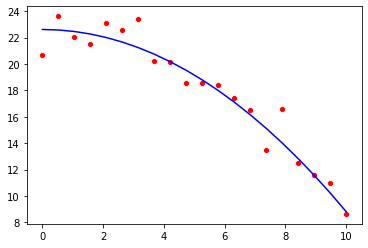

In [190]:
sns.scatterplot(X_loc[:, 0], y_temp, color="red")
sns.lineplot(X_loc[:, 0], g(X_loc, w_opt, b_opt), color="blue");

### Solution 6

In [198]:
w_opt, b_opt

(-0.03452583255198175, 22.614911696174783)

In [4]:
out = optimize.minimize(lambda x: loss_abs(*x) + 0.5*abs(x[1]), [w_guess, b_guess])
out.x

NameError: name 'optimize' is not defined

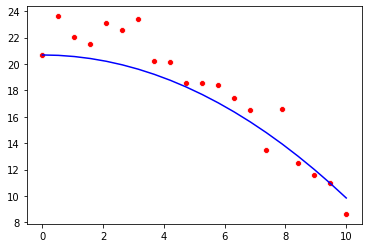

In [205]:
sns.scatterplot(X_loc[:, 0], y_temp, color="red")
sns.lineplot(X_loc[:, 0], g(X_loc, out.x[0], out.x[1]), color="blue");